# Nueve reinas.
### Autor: Saúl Sosa Díaz



---
## El Problema.

  



In [37]:
using JuMP, GLPK

function solve_nqueens(n)
    model = Model(GLPK.Optimizer)
    
    # Variables de decisión
    @variable(model, x[1:n, 1:n], Bin)
    

    @objective(model, Max, sum(x[i, j] for i in 1:n, j in 1:n))
    # Restricciones de fila y columna
    for i in 1:n
        @constraint(model, sum(x[i, j] for j in 1:n) <= 1)  # Una reina por fila
        @constraint(model, sum(x[j, i] for j in 1:n) <= 1)  # Una reina por columna
    end
    
    # Restricciones de diagonales
    for i in 1:n
        for j in 1:n
            # Diagonal principal superior derecha
            @constraint(model, sum(x[k, l] for k in 1:n, l in 1:n if k-l == i-j) <= 1)
            # Diagonal principal inferior izquierda
            @constraint(model, sum(x[k, l] for k in 1:n, l in 1:n if k+l == i+j) <= 1)
        end
    end
    
    # Resuelve el modelo
    optimize!(model)
    
    return value.(x)
end

solve_nqueens (generic function with 1 method)

In [38]:
using Plots

function plot_nqueens(solution)
    n = size(solution, 1)
    p = plot(; 
            legend=false, 
            ratio=1, 
            xlims=(0, n), 
            ylims=(0, n), 
            xticks=1:n, 
            yticks=1:n, 
            border=:none,   
            background_color_inside=:lightgray, 
            background_color_outside=:transparent, 
            grid=false
            )
    
    # Draw the board
    for i in 1:n
        for j in 1:n
            if (i + j) % 2 == 0
                plot!([j-1, j, j, j-1, j-1], [n-i, n-i, n-i+1, n-i+1, n-i], fill=(0, :lightgray), linealpha=0)
            else
                plot!([j-1, j, j, j-1, j-1], [n-i, n-i, n-i+1, n-i+1, n-i], fill=(0, :darkgray), linealpha=0)
            end
        end
    end

    pastel_blue = RGB(0.6, 0.8, 0.9)
    marker_diameter = min(1.0/n * 100, 20)  # This adjusts the size of the marker based on the number of squares. 20 is a limiting value.
    # Place the queens
    for i in 1:n
        for j in 1:n
            if solution[i, j] == 1
                scatter!([j-0.5], [n-i+0.5], markercolor=pastel_blue, markershape=:circle, markerstrokewidth=1, markersize=marker_diameter, label=false)
            end
        end
    end
    
    return p
end

plot_nqueens (generic function with 1 method)

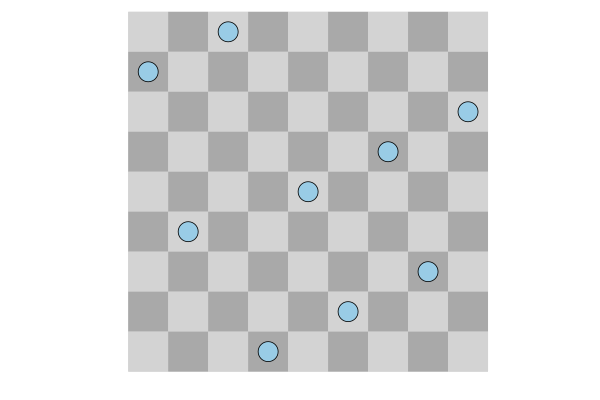

In [47]:
n = 9
result = solve_nqueens(n)
plot_nqueens(result)

### Resolvemos el modelo.

#### Introducimos los datos.

#### Definimos el modelo.

#### Resolvemos el modelo.

#### Mostramos el resultado.

### Resolución del problema.
Importamos los paquetes necesarios.

#### Introducimos los datos.

#### Resolvemos el modelo.

#### Mostramos la solución óptima.